In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
dffish = pd.read_csv('fish_data.csv')

In [3]:
dffish['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [4]:
dffish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [5]:
dffish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [6]:
print("data shape : ",dffish.shape)

data shape :  (4080, 4)


In [7]:
dffish.species.value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [8]:
dffish.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [9]:
dffish.duplicated().sum()

109

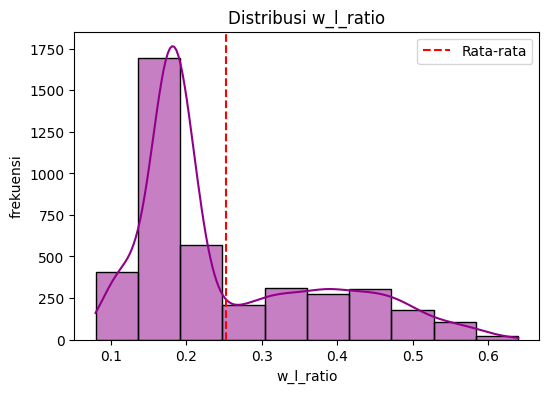

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=dffish, x='w_l_ratio', bins=10, kde= True, color= '#91008a') #menggunakan inisialsiasi visual histogram plot
plt.axvline(dffish['w_l_ratio'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()

plt.title('Distribusi w_l_ratio')
plt.xlabel('w_l_ratio')
plt.ylabel('frekuensi')
plt.show()

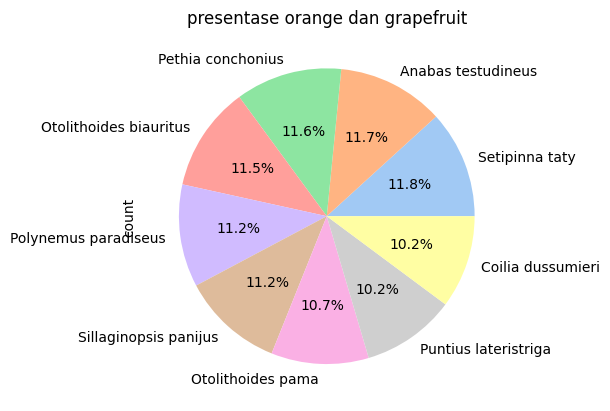

In [11]:
sns.set_palette('pastel')
dffish['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('presentase orange dan grapefruit')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19660\128087651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dffish, x='species', palette='rocket')


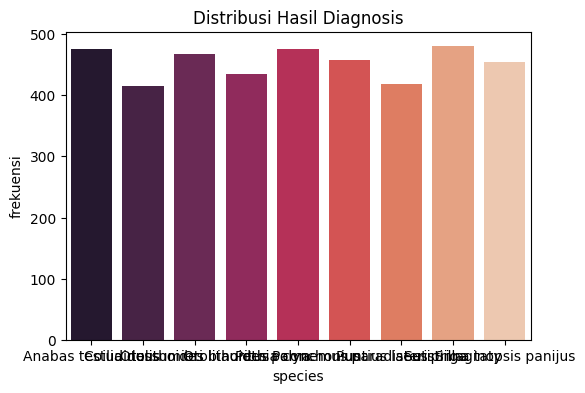

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=dffish, x='species', palette='rocket')

plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('species')
plt.ylabel('frekuensi')
plt.show()

In [13]:
x = dffish.drop(columns=['species'])
y = dffish['species']

print("x:",x.shape)
print("y:",y.shape)

x: (4080, 3)
y: (4080,)


In [14]:
y = dffish['species'].values
le = LabelEncoder().fit(y)
y = le.transform(y)
y

array([0, 0, 0, ..., 8, 8, 8])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# List kernel yang akan diuji
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Dictionary untuk menyimpan hasil akurasi
results = {}
# Melatih model SVM dengan berbagai kernel
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(x_train, y_train)

    # Prediksi
    y_pred = clf.predict(x_test)

    # Evaluasi akurasi
    clf_acc = accuracy_score(y_test, y_pred)
    results[kernel] = clf_acc

    # Print classification report untuk kernel ini
    print(f"\nKernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print("Akurasi SVM ({}): {:.2f}%".format(kernel, clf_acc * 100))

# Menentukan kernel terbaik
best_kernel = max(results, key=results.get)
print("\nKernel terbaik adalah '{}' dengan akurasi {:.2f}%".format(best_kernel, results[best_kernel] * 100))



Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.68      0.63      0.65        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.68      0.73      0.71       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816

Akurasi SVM (linear): 92.52%

Kernel: poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.72      0.58      0.64        91
           3       

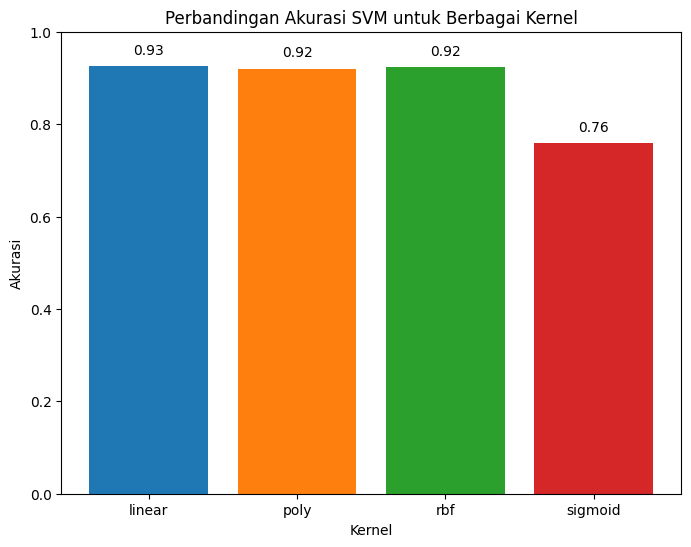

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Tambahkan judul dan label
plt.title('Perbandingan Akurasi SVM untuk Berbagai Kernel')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Batasi sumbu y dari 0 ke 1 (akurasi dalam skala 0-1)

# Tambahkan nilai akurasi di atas setiap bar
for kernel, acc in results.items():
    plt.text(kernel, acc + 0.02, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

# Tampilkan visualisasi
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV


parameters ={
    'kernel' : ['rbf','poly','sigmoid','linear'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,#6 tread pada processor 
                           verbose=1,#untuk mendapatkan feedback yang informatif
                           scoring='accuracy') # untuk nilai perbandingan

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=1)

In [20]:
print(f'Best Score : {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameter')
for param in parameters:
    print(f'\t{param} : {best_params[param]}') 

Best Score : 0.94056454870865
Best Parameter
	kernel : rbf
	C : 100
	gamma : 1


In [21]:
y_pred = clf.predict(x_test)
y_pred

array([4, 7, 3, 4, 0, 3, 7, 8, 3, 3, 8, 1, 3, 2, 6, 1, 4, 1, 4, 1, 8, 7,
       3, 5, 0, 7, 8, 0, 6, 8, 5, 8, 4, 7, 4, 8, 5, 4, 3, 8, 0, 4, 2, 3,
       7, 7, 4, 4, 4, 0, 0, 7, 0, 3, 7, 3, 4, 7, 1, 7, 7, 8, 0, 6, 2, 4,
       0, 6, 2, 4, 8, 7, 0, 2, 1, 2, 4, 7, 8, 6, 4, 7, 6, 6, 2, 6, 8, 4,
       4, 8, 2, 2, 6, 6, 8, 7, 3, 0, 0, 0, 2, 1, 1, 6, 0, 8, 1, 7, 5, 5,
       0, 0, 0, 7, 2, 6, 7, 3, 2, 2, 0, 0, 8, 6, 7, 2, 6, 2, 5, 5, 0, 3,
       1, 7, 5, 4, 3, 3, 5, 2, 2, 4, 7, 6, 5, 7, 0, 3, 3, 5, 4, 4, 4, 5,
       3, 6, 4, 1, 1, 3, 6, 1, 0, 7, 6, 8, 2, 7, 4, 0, 8, 4, 5, 5, 7, 4,
       6, 6, 3, 0, 0, 7, 0, 4, 7, 4, 1, 7, 1, 7, 3, 8, 7, 5, 2, 3, 8, 1,
       0, 4, 5, 0, 8, 1, 8, 8, 3, 4, 3, 5, 1, 8, 4, 1, 6, 3, 2, 4, 7, 0,
       4, 7, 3, 5, 4, 1, 7, 7, 4, 8, 3, 4, 7, 2, 1, 7, 2, 8, 5, 3, 7, 7,
       4, 4, 2, 8, 0, 7, 7, 5, 8, 6, 4, 0, 2, 5, 3, 4, 7, 4, 6, 4, 8, 6,
       4, 7, 6, 8, 7, 8, 2, 1, 4, 7, 8, 5, 3, 3, 0, 4, 5, 4, 1, 2, 3, 0,
       8, 7, 0, 0, 6, 7, 1, 4, 7, 5, 2, 4, 3, 4, 2,

In [22]:
# Normalisasi data dan reduksi dimensi dengan PCA
scaler = StandardScaler()
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaler.fit_transform(x))

In [23]:
# Latih model SVM
svm = SVC(kernel='rbf', C=100, gamma='scale')
svm.fit(x_pca, y)


SVC(C=100)

In [24]:
print("Shape of x_pca:", x_pca.shape)

Shape of x_pca: (4080, 2)


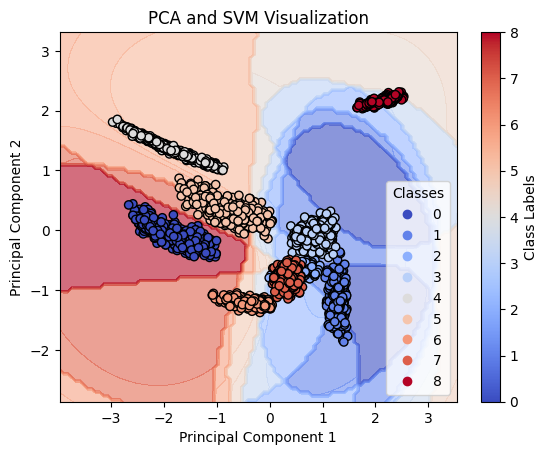

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Buat grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(
    np.linspace(x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1, 100),
    np.linspace(x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1, 100)
)

# Hitung decision function
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm.decision_function(grid_points)

# Jika multi-kelas, pilih salah satu skor keputusan atau rata-rata
if Z.ndim > 1:  # Multi-kelas
    Z = Z[:, 0]  # Pilih skor keputusan untuk pasangan kelas pertama
Z = Z.reshape(xx.shape)

# Plot decision boundary menggunakan contour
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='coolwarm', alpha=0.6)

# Plot garis decision boundary (nilai Z = 0)
plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')

# Plot titik data dengan color map sesuai label kelas
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# Menambahkan colorbar dengan label untuk decision function
cbar = plt.colorbar(scatter)
cbar.set_label('Class Labels')

# Menambahkan label dan judul
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and SVM Visualization')

# Menambahkan legenda untuk titik data
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()


In [26]:
new_data = {'leght' : [7.57],
            'weight' : [3.36],
            'w_l_ratio' : [0.44],}
new_data = pd.DataFrame(new_data)
new_data

,leght,weight,w_l_ratio
0,7.57,3.36,0.44


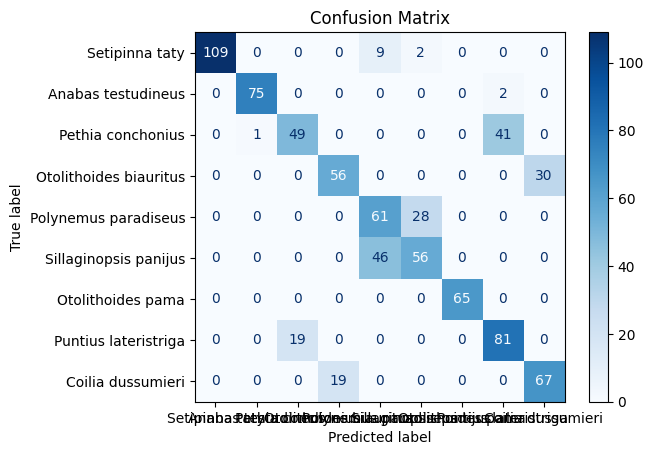

In [27]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Setipinna taty', 'Anabas testudineus', 'Pethia conchonius', 
          'Otolithoides biauritus', 'Polynemus paradiseus', 
          'Sillaginopsis panijus', 'Otolithoides pama', 
          'Puntius lateristriga', 'Coilia dussumieri']

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
import pickle
fw = open('fishsvm.pkl', 'wb')
pickle.dump(grid_search , fw)